# Compiled group work from all members 
### Notashia Thomas
### Ian Vaillant
### Sahith Thallam

In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from datetime import datetime
import calendar

In [2]:
file = r'Data Model - Pizza Sales.xlsx'
df = pd.read_excel(file)

## Question 1 
Which pizza sells the most?

In [3]:
df_pizza_name_by_count = df.groupby(['pizza_name']).size().reset_index(name='count')
df_pizza_name_by_count.head(20)

,pizza_name,count
0,The Barbecue Chicken Pizza,2372
1,The Big Meat Pizza,1811
2,The Brie Carre Pizza,480
3,The Calabrese Pizza,927
4,The California Chicken Pizza,2302
5,The Chicken Alfredo Pizza,980
6,The Chicken Pesto Pizza,961
7,The Classic Deluxe Pizza,2416
8,The Five Cheese Pizza,1359
9,The Four Cheese Pizza,1850


In [4]:
#Group pizza names by total count
df_pizza_name_by_count = df.groupby(['pizza_name']).size().reset_index(name='count')
#Get the highest count in the dataframe
highest_count = df_pizza_name_by_count['count'].max()
#Get the pizza name with the highest count from the dataframe
df_pizza_name_by_count[df_pizza_name_by_count['count'] == highest_count]
df_pizza_name = df_pizza_name_by_count[df_pizza_name_by_count['count'] == highest_count]

print('The pizza that sells the most is: ', df_pizza_name['pizza_name'].item())
print('The number sold is:', highest_count)

The pizza that sells the most is:  The Classic Deluxe Pizza
The number sold is: 2416


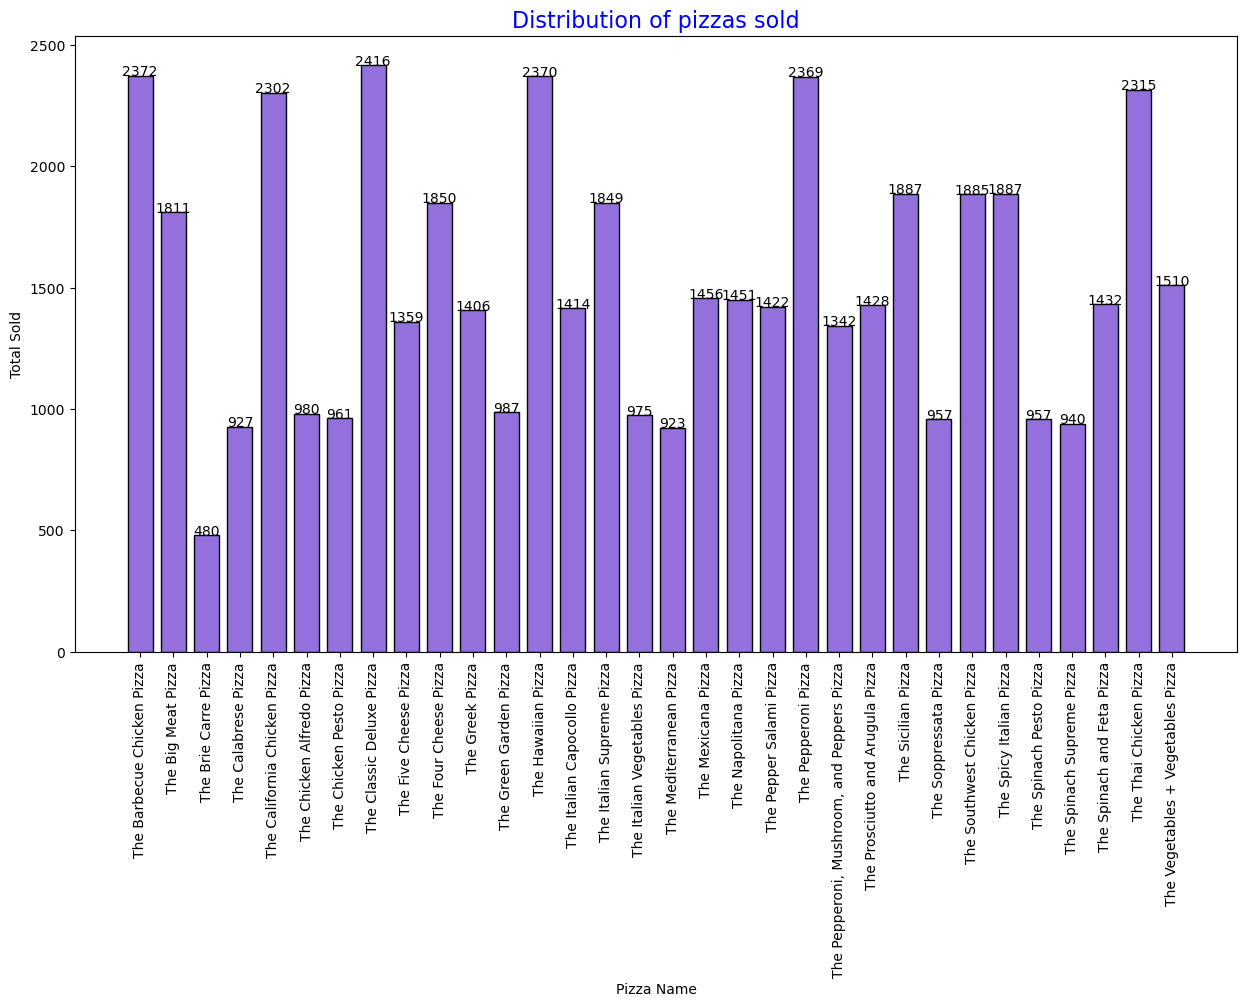

In [5]:
#Plot a bar graph of total pizzas sold by pizza name
def valuelabel(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha='center')

plt.figure(figsize=(15,8))
plt.bar(df_pizza_name_by_count['pizza_name'], df_pizza_name_by_count['count'], color='mediumpurple', width=0.75, edgecolor='black')
valuelabel(df_pizza_name_by_count['pizza_name'], df_pizza_name_by_count['count'])
plt.xlabel('Pizza Name')
plt.xticks(rotation='90')
plt.ylabel('Total Sold')
plt.title('Distribution of pizzas sold',color='blue', fontsize=16)
plt.show()

#Reference: https://www.delftstack.com/howto/matplotlib/add-value-labels-on-matplotlib-bar-chart/

## Question 2
Which ingredients are in demand?

In [6]:
#split up list of ingredients
df_pizza_ingredients = df.copy()
df_ingredients = df_pizza_ingredients.pizza_ingredients.str.split(',')
df_ingredients.head(20)

0          [Sliced Ham,  Pineapple,  Mozzarella Cheese]
1     [Pepperoni,  Mushrooms,  Red Onions,  Red Pepp...
2     [Mozzarella Cheese,  Provolone Cheese,  Smoked...
3     [Calabrese Salami,  Capocollo,  Tomatoes,  Red...
4     [Tomatoes,  Red Peppers,  Jalapeno Peppers,  R...
5     [Chicken,  Pineapple,  Tomatoes,  Red Peppers,...
6     [Calabrese Salami,  Capocollo,  Tomatoes,  Red...
7     [Prosciutto di San Daniele,  Arugula,  Mozzare...
8     [Calabrese Salami,  Capocollo,  Tomatoes,  Red...
9     [Calabrese Salami,  Capocollo,  Tomatoes,  Red...
10    [Barbecued Chicken,  Red Peppers,  Green Peppe...
11    [Kalamata Olives,  Feta Cheese,  Tomatoes,  Ga...
12    [Spinach,  Red Onions,  Pepperoni,  Tomatoes, ...
13    [Spinach,  Red Onions,  Pepperoni,  Tomatoes, ...
14    [Pepperoni,  Mushrooms,  Red Onions,  Red Pepp...
15    [Spinach,  Mushrooms,  Tomatoes,  Green Olives...
16    [Capocollo,  Red Peppers,  Tomatoes,  Goat Che...
17    [Calabrese Salami,  Capocollo,  Tomatoes, 

In [7]:
#group list of lists by ingredient
all_values = [list[1] for list in df_ingredients]
unique_values = set(all_values)
print(unique_values)
result = []
for value in unique_values:
  this_group = []
  for list in df_ingredients:
    if list[1] == value:
      this_group.append(list[1])
  result.append(this_group)
print(result)

#Reference: https://www.codespeedy.com/group-a-list-by-the-values-in-python

{' Fontina Cheese', ' Prosciutto', ' Red Peppers', ' Arugula', ' Pancetta', ' Provolone Cheese', ' Artichokes', ' Gorgonzola Piccante Cheese', ' Pineapple', ' Mushrooms', ' Tomatoes', ' Feta Cheese', ' Capocollo', ' Pepperoni', ' Anchovies', ' Artichoke', ' Red Onions'}
[[' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fontina Cheese', ' Fon

In [8]:
#now capture totals per ingredient
df_ingredient_count = pd.DataFrame(columns=['Ingredient', 'count'])
for x in result:
    df_ingredient_count.loc[len(df_ingredient_count.index)] = [x[0], len(x)]

df_ingredient_count.head(20)

,Ingredient,count
0,Fontina Cheese,957
1,Prosciutto,480
2,Red Peppers,5242
3,Arugula,1428
4,Pancetta,927
5,Provolone Cheese,1359
6,Artichokes,2855
7,Gorgonzola Piccante Cheese,1850
8,Pineapple,4685
9,Mushrooms,6177


In [9]:
print('The ingredient in highest demand is:', df_ingredient_count['Ingredient'].max())

The ingredient in highest demand is:  Tomatoes


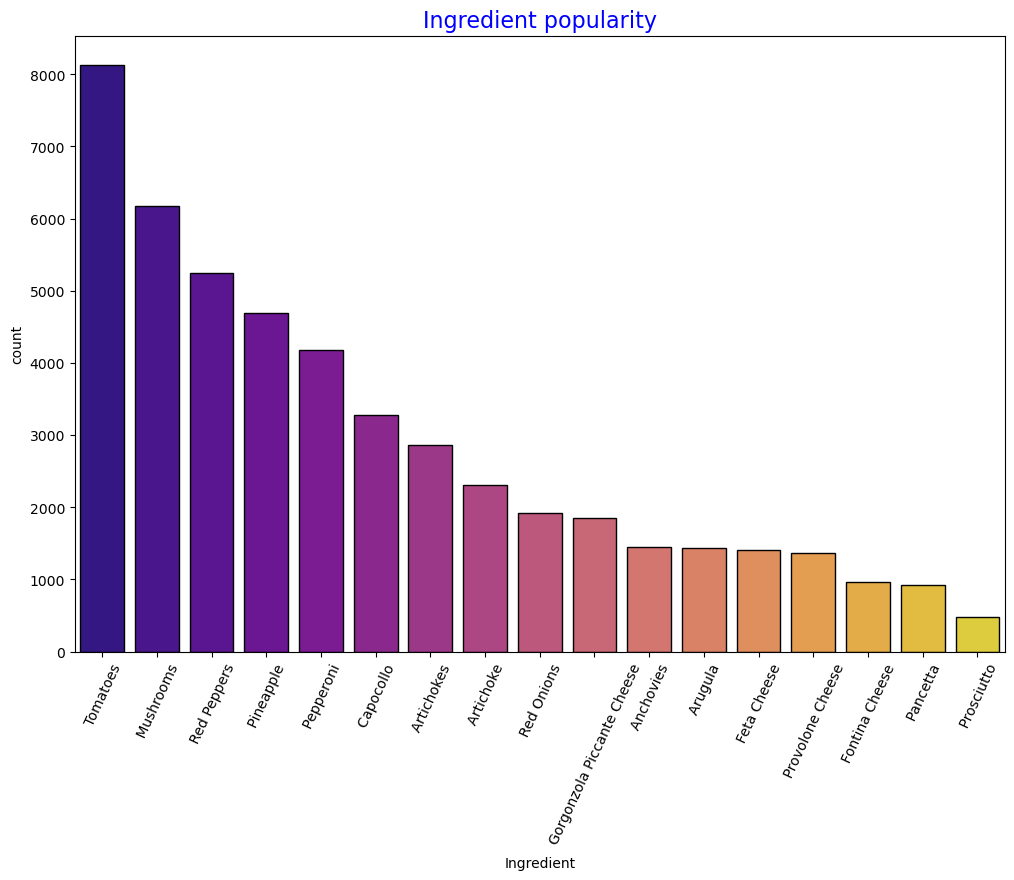

In [10]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.xticks(rotation='65')
plt.title("Ingredient popularity",color='blue', fontsize=16)
sns.barplot(data=df_ingredient_count.sort_values(by='count', ascending=False), x='Ingredient', y='count', edgecolor='black', palette='plasma')
plt.show()

## Question 3
Are there more (or less) sales of a certain type of pizza in a certain month, or day, or time of the day?

In [12]:
#add column for order month and day
df['order_month'] = df['order_date'].dt.month_name()
df['order_day'] = df['order_date'].dt.strftime('%A')

all_months = calendar.month_name[1:]

df.tail(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_day
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,December,Thursday
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,December,Thursday
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,December,Thursday
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,December,Thursday
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,December,Thursday


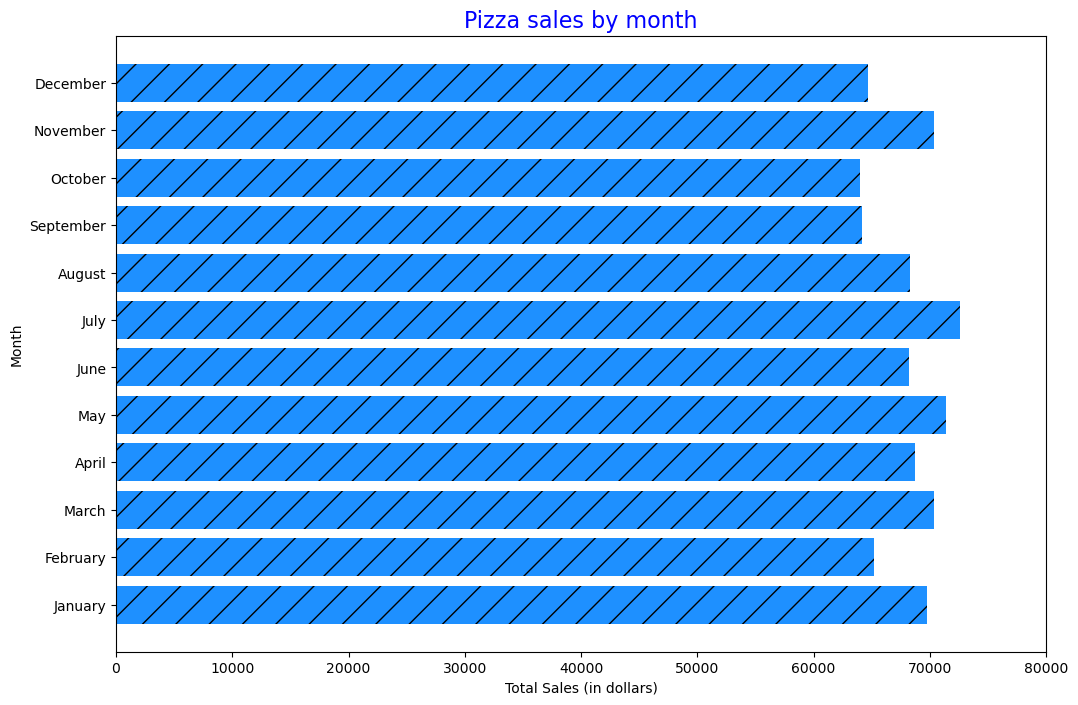

In [13]:
#count sales by month
df_order_monthly_sales = df.groupby('order_month')[['total_price']].sum()
df_order_monthly_sales = df_order_monthly_sales.reindex(all_months)

fig, ax = plt.subplots(figsize = (12, 8))
colors = ['dodgerblue']
#colors = ['yellow' if (df_order_monthly_sales['total_price'].item() == df_order_monthly_sales['total_price'].max()) else 'dodgerblue']
plt.barh(df_order_monthly_sales.index,df_order_monthly_sales['total_price'], color = colors, hatch=('/'))
plt.title('Pizza sales by month',color='blue', fontsize=16)
plt.xlim(0, 80000)
plt.ylabel('Month')
plt.xlabel('Total Sales (in dollars)')
plt.show()

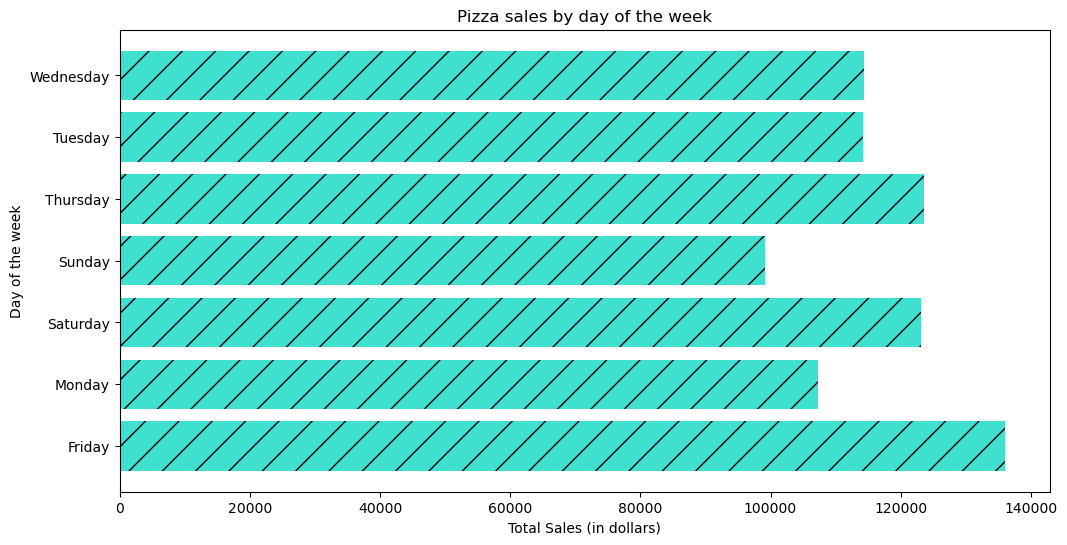

In [14]:
#count sales by day

df_order_daily_sales = df.groupby('order_day')[['total_price']].sum()

fig, ax = plt.subplots(figsize = (12, 6))
#colors = ['cyan', 'darkcyan', 'turquoise', 'springgreen', 'limegreen', 'darkgreen']
colors = ['turquoise']
plt.barh(df_order_daily_sales.index,df_order_daily_sales['total_price'], color = colors, hatch=('/'))
plt.title('Pizza sales by day of the week')
plt.xlabel('Total Sales (in dollars)')
plt.ylabel('Day of the week')
plt.show()

In [15]:
#add order hours column
i = 0
hours = []
while i < len(df.order_time):
    hours.append(df.order_time[i].hour)
    i = i + 1

df.insert(6,"order_hour",hours)

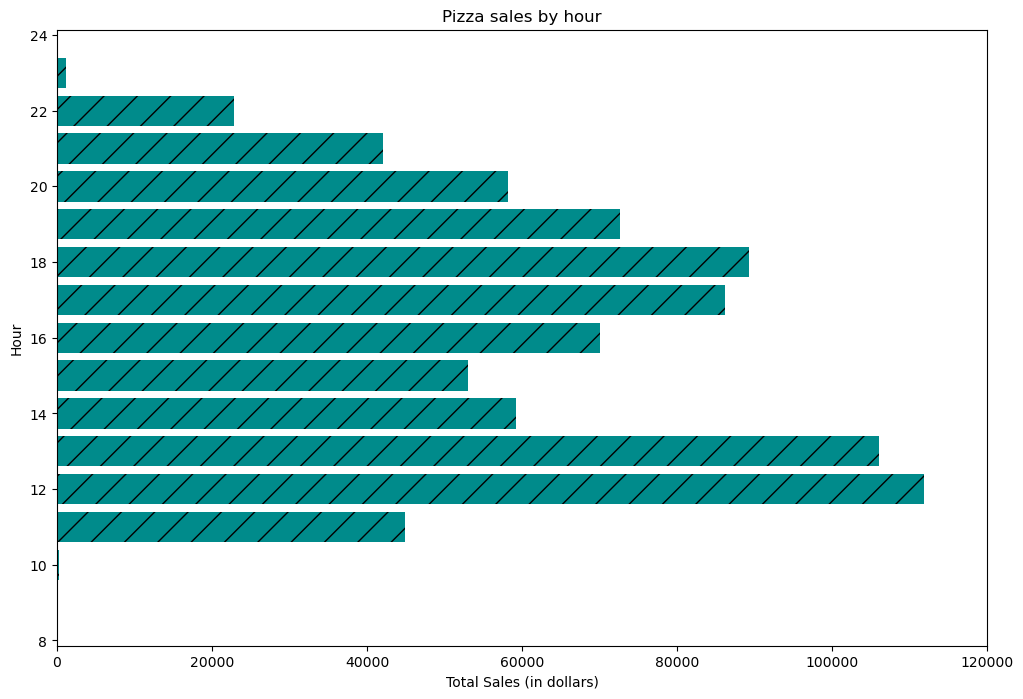

In [16]:
df_order_hourly_sales = df.groupby('order_hour')[['total_price']].sum()

fig, ax = plt.subplots(figsize = (12, 8))
#colors = ['cyan', 'darkcyan', 'turquoise', 'springgreen', 'limegreen', 'darkgreen']
colors = ['darkcyan']
plt.barh(df_order_hourly_sales.index,df_order_hourly_sales['total_price'], color = colors, hatch=('/'))
plt.title('Pizza sales by hour')
plt.xlabel('Total Sales (in dollars)')
plt.xlim(0, 120000)
plt.ylabel('Hour')
plt.show()

## Question 4a
Which pizza sizes are sold more often? 

In [17]:
#Group size by total count
df_pizza_size_by_count = df.groupby(['pizza_size']).size().reset_index(name='count')
#Get the highest count in the dataframe
highest_count = df_pizza_size_by_count['count'].max()
#Get the pizza size with the highest count from the dataframe
df_pizza_size_by_count[df_pizza_size_by_count['count'] == highest_count]
df_pizza_size = df_pizza_size_by_count[df_pizza_size_by_count['count'] == highest_count]
df_pizza_size_by_count

,pizza_size,count
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


In [18]:
print('The pizza size that sells the most is: ', df_pizza_size['pizza_size'].item())
print('The number sold is:', highest_count)

The pizza size that sells the most is:  L
The number sold is: 18526


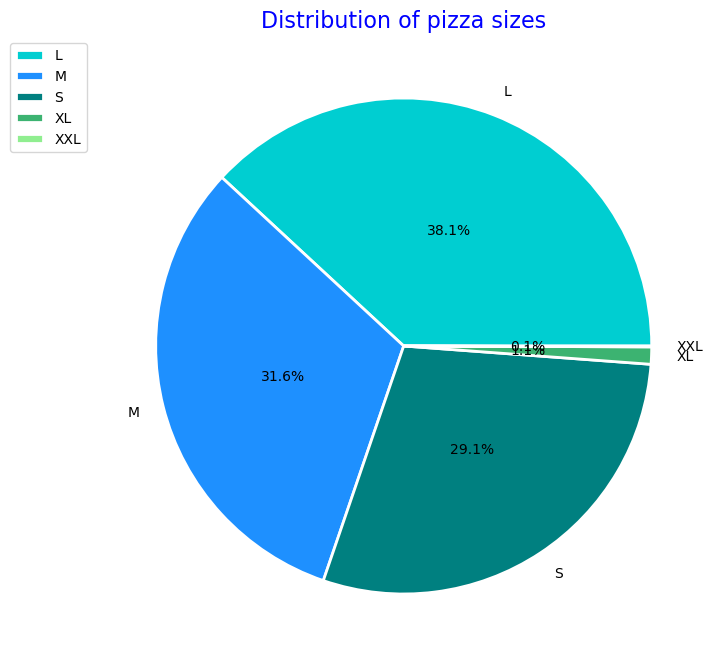

In [19]:
#Configure and plot pie graph
labels = df_pizza_size_by_count['pizza_size']
pie_colors = ['darkturquoise', 'dodgerblue', 'teal', 'mediumseagreen', 'lightgreen', 'yellow']
plt.figure(figsize=(8,10))
plt.pie(df_pizza_size_by_count['count'], labels=labels,  
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'size': 'medium'}, startangle=0, colors=pie_colors, autopct='%.1f%%',pctdistance=0.5)
plt.legend(labels, bbox_to_anchor=(0, 1))
plt.title('Distribution of pizza sizes',color='blue', fontsize=16)
plt.show()

## Question 4b
Which pizza types are sold more often? 

In [20]:
#Group type by total count
df_pizza_type_by_count = df.groupby(['pizza_category']).size().reset_index(name='count')
#Get the pizza type with the highest count from the dataframe
df_pizza_type_by_count[df_pizza_type_by_count['count'] == df_pizza_type_by_count['count'].max()]
df_pizza_type = df_pizza_type_by_count[df_pizza_type_by_count['count'] == df_pizza_type_by_count['count'].max()]
df_pizza_type_by_count

,pizza_category,count
0,Chicken,10815
1,Classic,14579
2,Supreme,11777
3,Veggie,11449


In [21]:
print('The pizza type that sells the most is: ', df_pizza_type['pizza_category'].item())
print('The number sold is:', df_pizza_type_by_count['count'].max())

The pizza type that sells the most is:  Classic
The number sold is: 14579


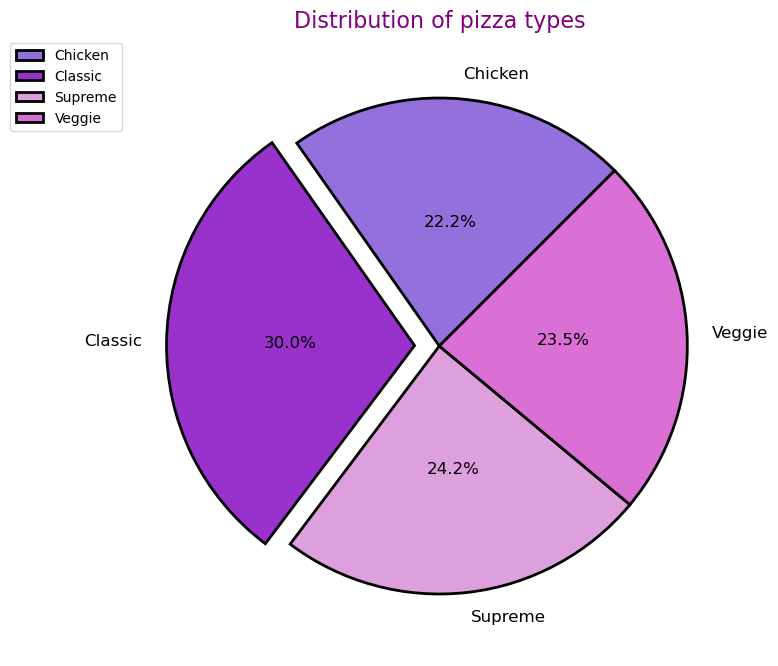

In [22]:
#Configure and plot pie graph
labels = df_pizza_type_by_count['pizza_category']
explode = (0.0, 0.1, 0.0, 0.0)
pie_colors = ['mediumpurple', 'darkorchid', 'plum', 'orchid']
plt.figure(figsize=(8,10))
plt.pie(df_pizza_type_by_count['count'], labels=labels, explode=explode,  
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'black'},
        textprops={'size': 'large'}, startangle=45, colors=pie_colors, autopct='%.1f%%',pctdistance=0.5)
plt.legend(labels, bbox_to_anchor=(0, 1))
plt.title('Distribution of pizza types',color='purple', fontsize=16)
plt.show()

### Reseting the data frame in order to easily complie code into file from second group member

In [23]:
file = r'Data Model - Pizza Sales.xlsx'
df = pd.read_excel(file)

## Question 5
Is there a time of the day when there is a peak sale? If yes, does that depend on the day of the week, or month?

In [25]:
#add hour of day column

i = 0
hours = []
while i < len(df.order_time):
    hours.append(df.order_time[i].hour)
    i = i + 1

df.insert(6,"order_hour",hours)

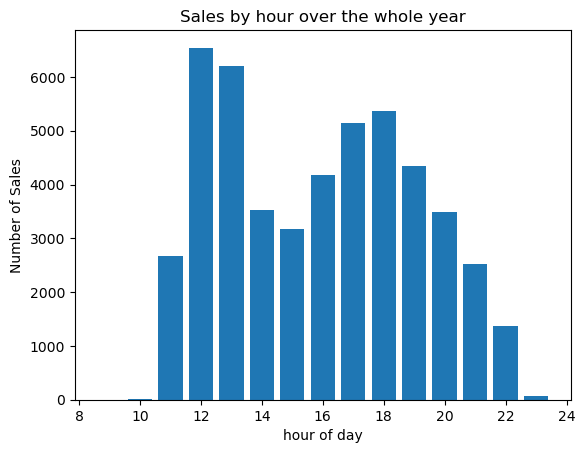

In [26]:
#bar chart showing number of sales (units sold) by hour of day
dfHourCounts = df.groupby(df.order_hour).size().reset_index(name = 'counts')

plt.bar(dfHourCounts.order_hour,dfHourCounts.counts,width = .8,align='center')
plt.title('Sales by hour over the whole year')
plt.xlabel('hour of day')
plt.ylabel('Number of Sales')
plt.show()

add columns for order month, day and weekday

In [27]:
df.order_date = pd.to_datetime(df.order_date) #convert to pandas datetime object in order to use pandas function

#utilize pandas functions to extract the week, day, and month numbers and create seperate columns for each
df['order_week'] = df.order_date.dt.isocalendar().week
df['order_day'] = df.order_date.dt.isocalendar().day
df['order_month'] = df.order_date.dt.month


Next figure out the most popular hours for each month

In [28]:
#group by month and order hour and get the count of each grouping
mh = df.groupby([df.order_month,df.order_hour]).size().reset_index(name='counts')


#below code is to make a list of the most popular hour for each month and the number of pizzas sold in that hour
i = 1
monthMaxHour = []
monthMaxCount = []
while i < 13:
    workingFrame = mh[mh.order_month == i]
    monthMaxCount.append(workingFrame.counts.max())
    monthMaxHour.append(workingFrame.order_hour[workingFrame.counts.idxmax()])
    i += 1

#combining the lists into a data frame where we can easily see the month, most popular hour and pizzas sold
months = [1,2,3,4,5,6,7,8,9,10,11,12]
data = {'month': months,'mostPopularHour': monthMaxHour,'pizzasSold': monthMaxCount}
frame = pd.DataFrame(data)
frame


,month,mostPopularHour,pizzasSold
0,1,12,571
1,2,12,503
2,3,12,598
3,4,12,572
4,5,12,548
5,6,12,629
6,7,13,586
7,8,12,532
8,9,12,482
9,10,13,561


We can see from the data frame that all months have the most popular hours between 1200 and 1300, each month corresponds to the overall most popular hour<br>
Now look at day of the week

In [29]:
dh = df.groupby(['order_day','order_hour']).size().reset_index(name='counts')

i = 1
dayMaxHour = []
dayMaxCount = []
while i < 8:
    workingFrame = dh[dh.order_day == i]
    dayMaxCount.append(workingFrame.counts.max())
    dayMaxHour.append(workingFrame.order_hour[workingFrame.counts.idxmax()])
    i += 1

day = [1,2,3,4,5,6,7]
data = {'weekday': day,'mostPopularHour': dayMaxHour,'pizzasSold': dayMaxCount}
frame = pd.DataFrame(data)
frame


,weekday,mostPopularHour,pizzasSold
0,1,12,1101
1,2,12,1068
2,3,12,1021
3,4,12,1106
4,5,12,1064
5,6,18,873
6,7,18,728


We can see that on 6th and 7th weekday (saturday and sunday) the most popular hour is 1800, more people are getting pizza for dinner on the weekend! Below we will try to visualize this data in a graph

[Text(0.5, 1.0, 'Peak salses hour by weekday'), Text(0, 0.5, 'Peak Hour')]

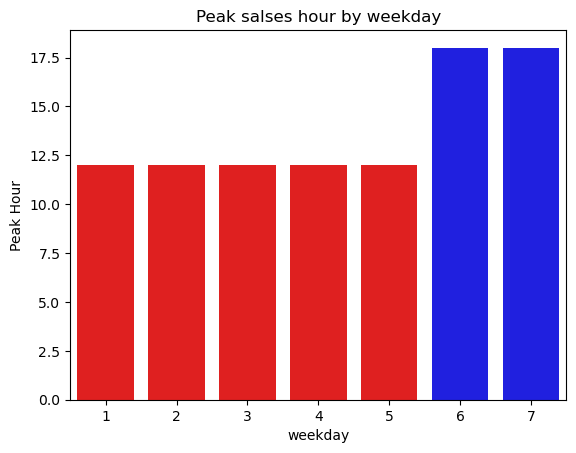

In [30]:
sns.barplot(x=frame.weekday, y=frame.mostPopularHour,palette=['r','r','r','r','r','b','b']).set(title='Peak salses hour by weekday',ylabel='Peak Hour')


## Question 6 and 7
What are the most popular ingredients, what are the least popular ingredient

In [31]:
#first we gather all ingredients into a sinlge list

#this loop concatenates all of the ingredients strings and splits them into a list
i = 1
allIngredients = df.pizza_ingredients[0]
while i < 48620:
    allIngredients = allIngredients + ',' + df.pizza_ingredients[i] #added in a ',' in concatenation as the first ingredient in a given string does not have anythign to seperate it from the previous
    i += 1


allIngredientsList = allIngredients.split(',')
allIngredientsList = [x.strip() for x in allIngredientsList]


In [32]:
#turn the list of all ingredients to a data frame

ingFrame = pd.DataFrame({'Ingredient':allIngredientsList})
ingFrameCounts = ingFrame.value_counts().to_frame().reset_index()
ingFrameCounts.columns = ['Ingredient','Count']

In [33]:
#the head of the frame will show us the most popular ingredients
ingFrameCounts.head(10)

,Ingredient,Count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


In [34]:
#tail will show the least popular
ingFrameCounts.tail(10)

,Ingredient,Count
55,Soppressata Salami,957
56,Pancetta,927
57,Friggitello Peppers,927
58,慛duja Salami,927
59,Plum Tomatoes,923
60,Prosciutto,480
61,Pears,480
62,Thyme,480
63,Caramelized Onions,480
64,Brie Carre Cheese,480


We have a 5 way tie for least used ingredients, is this all from a single specialty pizza?

In [35]:
pizzaNameCounts = df.groupby('pizza_name').size().reset_index(name='counts')
pizzaNameCounts[pizzaNameCounts.counts == 480]

,pizza_name,counts
2,The Brie Carre Pizza,480


Yes, we can see from the above code the only pizza that appears exactly 480 times is the brie carra pizza

## Question 8
what is the most popular pizza category by number of pizzas sold

In [36]:
categoryFrame = df.groupby('pizza_category').size().reset_index(name='counts')
print('Most Popular pizza Category is: ',categoryFrame.pizza_category[categoryFrame.counts.idxmax()])

Most Popular pizza Category is:  Classic


[Text(0.5, 1.0, 'Pizza Sales by Category')]

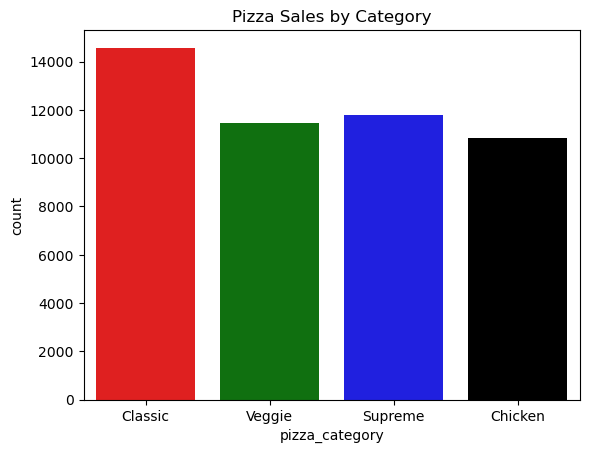

In [37]:
#visualize this via a bar graph
sns.countplot(x=df.pizza_category,palette=['r','g','b','black']).set(title='Pizza Sales by Category')


In [38]:
nf = df.groupby(['order_month','pizza_category']).size().reset_index(name='counts')
months = [1,2,3,4,5,6,7,8,9,10,11,12]
maxLocs = []
for m in months:
    maxLocs.append(nf[nf.order_month == m].counts.idxmax())

maxCats = []
for loc in maxLocs:
    maxCats.append(nf.pizza_category[loc])

maxCats #we can see that every month has Classis as the top category 

['Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic',
 'Classic']

## reset the data frame again to utilize the code from our third partner in a single file

In [40]:
df = pd.read_excel(file)

## Question 9 
Is there a correlation between number of ingredients and pizza price?

In [41]:
#first need to extract the number of ingredients from the pizza ingredients lists given

ingredients_count = []
for i in df["pizza_ingredients"]:
    no_of_ingredients = len(i.split(","))
    ingredients_count.append(no_of_ingredients)
    
df["no_of_ingredients"] = ingredients_count

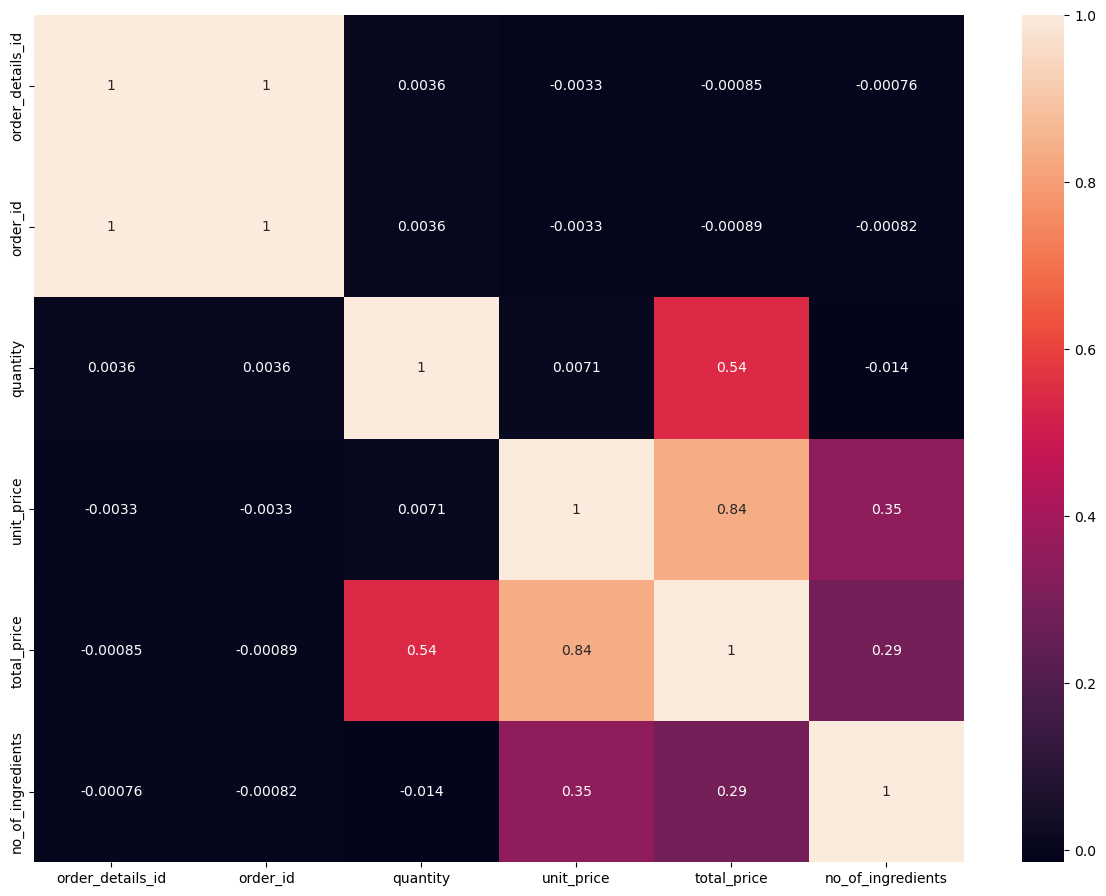

In [42]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
df["unit_price"].corr(df["no_of_ingredients"])

0.3537830754651707

**It is clear that there is no correlation between "number of ingredients" and "pizza price" as the value is very low between them**

## Question 10 
Are cheaper pizzas selling more?

In [44]:
unit_price_df = df["unit_price"].value_counts().rename_axis('unit_price').reset_index(name='counts').sort_values(by = "unit_price",ascending=False) 
unit_price_df.head()

,unit_price,counts
24,35.95,28
18,25.50,544
19,23.65,480
23,21.00,190
0,20.75,8685


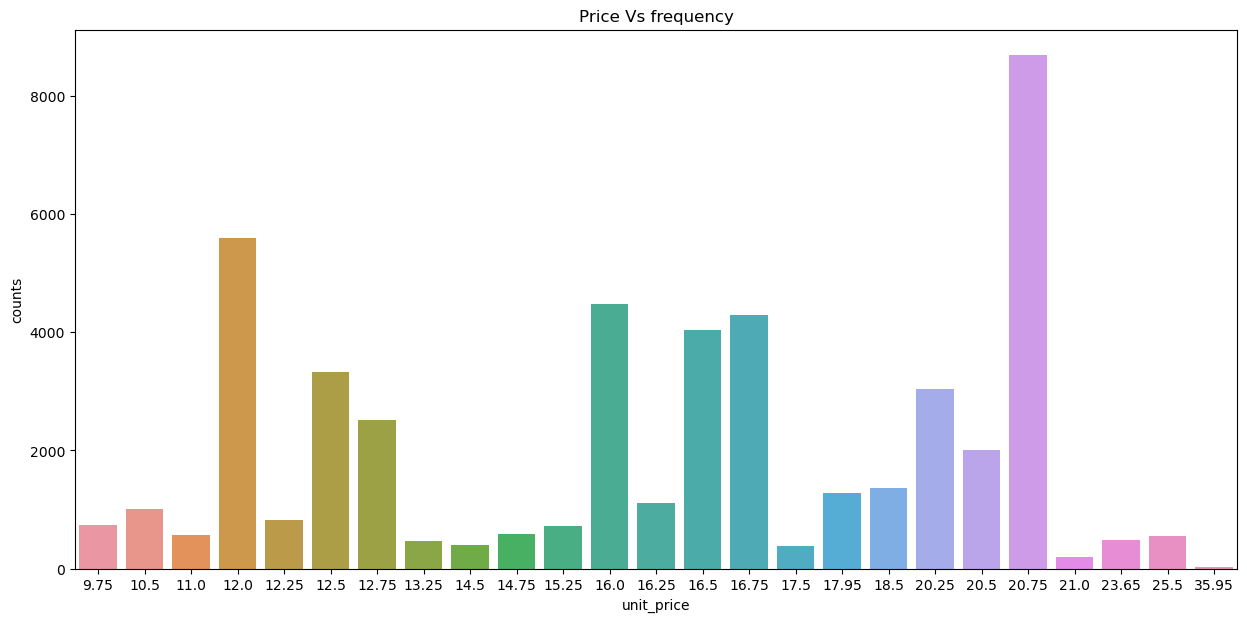

In [45]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Price Vs frequency")
sns.barplot(data=unit_price_df, x='unit_price', y='counts')
plt.show()

**It is clear from the graph that approximately, the higher the prizes, higher the sales of the pizza. So cheaper pizzas dosent have high number of sales when compared to other categories.**

## Qeustion 11
Does the popularity of pizza category change throughout the year/month/day?

In [46]:
#Extracted Year, Month, Dates columns to analyse the popularity of pizza category
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_month'] =pd.DatetimeIndex( df['order_date']).month
df['order_dates'] = df['order_date'].dt.day_name()

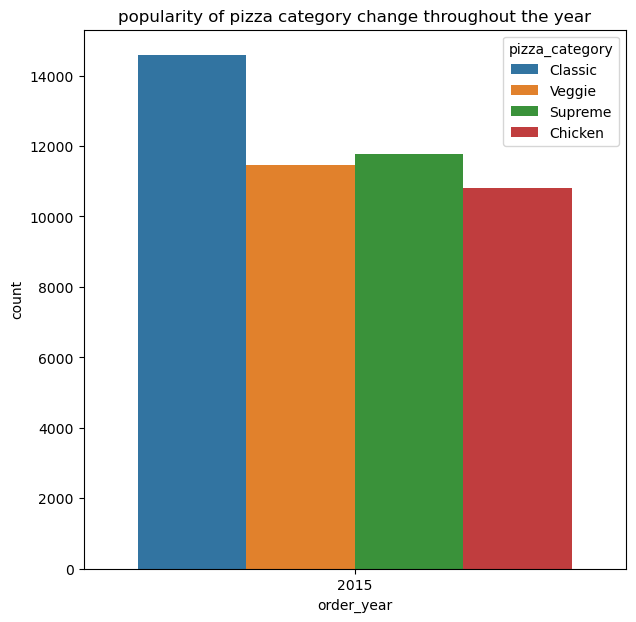

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x="order_year", hue="pizza_category", data= df)
plt.title("popularity of pizza category change throughout the year")
plt.show()

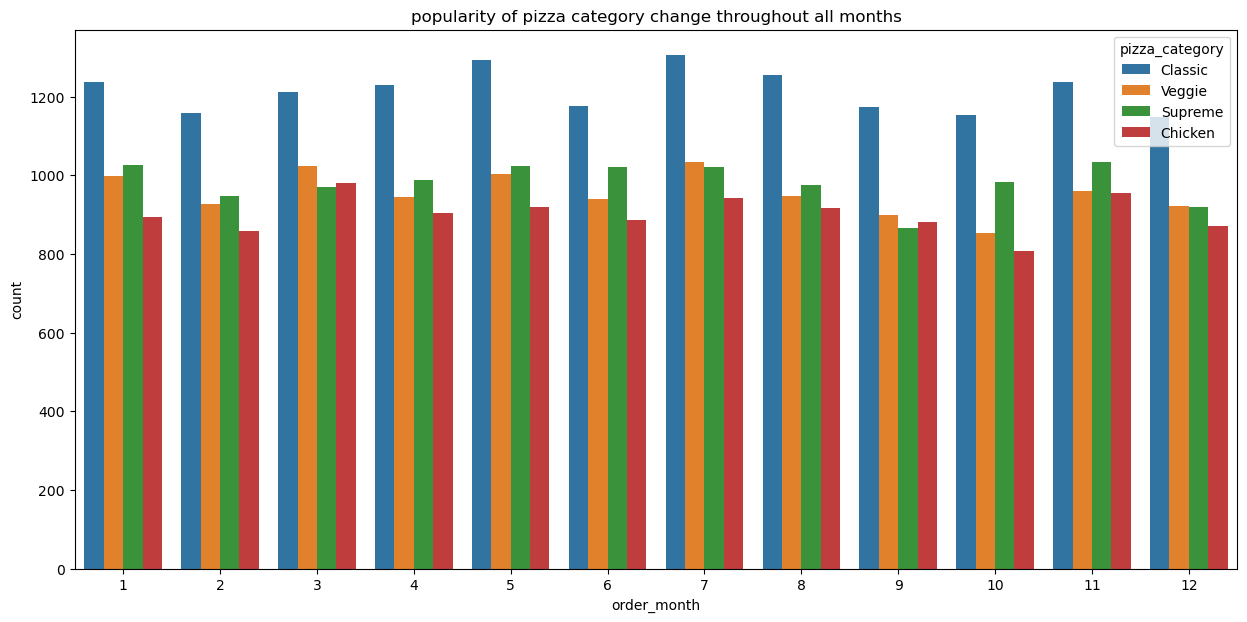

In [48]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x="order_month", hue="pizza_category", data= df)
plt.title("popularity of pizza category change throughout all months")
plt.show()

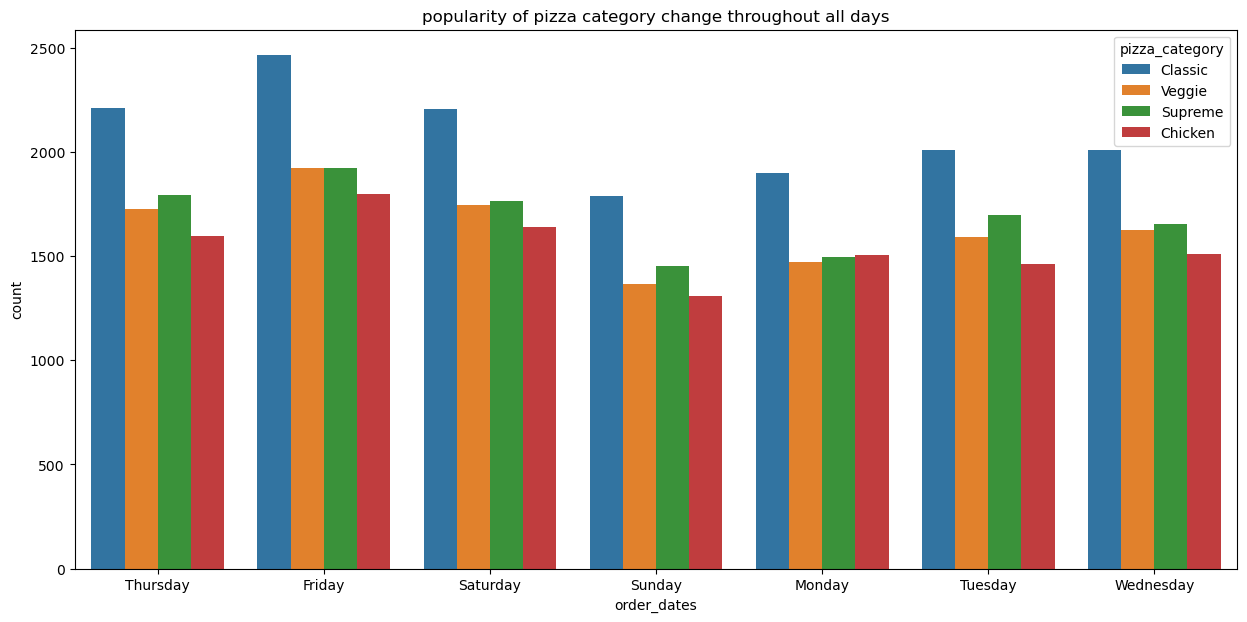

In [49]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x="order_dates", hue="pizza_category", data= df)
plt.title("popularity of pizza category change throughout all days")
plt.show()

**It is clear that the "popularity of pizza" category throughout the Years,months and days is pretty much similar in almost all the cases except some "veggie" and "Supreme" pizza orders**

## Question 12
What ingredient pairing has the highest average cost?

In [50]:
#Using groupby to find the average price of every ingredient group on the basis of "unit_price" and finding the mean of the group

average_cost_df = df.groupby('pizza_ingredients', as_index=False)['unit_price'].mean()
average_cost_df = average_cost_df.sort_values(['unit_price'], ascending=False).reset_index(drop = True)
average_cost_df

,pizza_ingredients,unit_price
0,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.650000
1,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",20.035633
2,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.500000
3,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",18.286069
4,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",18.104663
5,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",18.080504
6,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",18.024038
7,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",17.769740
8,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",17.637834
9,"Barbecued Chicken, Red Peppers, Green Peppers,...",17.572934


In [51]:
average_cost_df.iloc[0]["pizza_ingredients"]

'Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic'

After sorting the average unit price values we found that **"Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic"** is the ingredient group with the highest average cost